In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

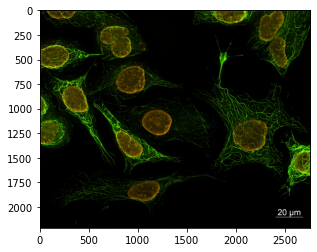

In [3]:
imagen = cv2.imread("Imagenes/Fluorescencia_custom/fluorescence_microscopy.jpg")
plt.imshow(imagen)

In [4]:
# shape del resultado que queremos
res_shape = ( 5, 6 )
res_alto = int(imagen.shape[0] / res_shape[0])
res_ancho = int(imagen.shape[1] / res_shape[1])
print(res_ancho, res_alto)

459 442


In [19]:
def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

In [20]:
resultado = []
for fila in range(res_shape[0]):
    for columna in range(res_shape[1]):
        # quiero que las imagenes tengan una superposicion de entre el 5% y el 40% mas o menos
        superposicion = np.matmul( np.random.uniform(low=0.05/2, high=0.4/2, size=(2,2)), [ [res_alto, 0], [0, res_ancho] ])
        resultado.append( imagen[
            max(0, int(fila * res_alto - superposicion[0][0])) : min(imagen.shape[0], int((fila + 1)* res_alto - superposicion[0][1])),
            max(0, int(columna * res_ancho - superposicion[1][0])) : min(imagen.shape[1], int((columna + 1)* res_ancho - superposicion[1][1])),
            :
        ] )

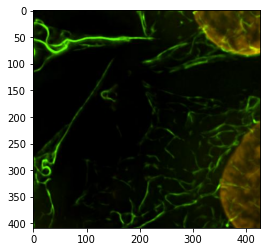

In [21]:
# por como aplicamos las superposiciones, las imagenes tienen todas distinto tamaño
# las escalamos para que midan lo que queremos
# además aplico una rotacion muy leve como para sumar ruido
for i in range(len(resultado)):
    escalado = np.array([
        [res_ancho / resultado[i].shape[1], 0, 0],
        [0, res_alto / resultado[i].shape[0], 0],
        [0, 0, 1]
    ])
    sigma = np.random.uniform(low=-0.06, high=0.06)
    rotacion = np.array([
        [np.cos(sigma), -np.sin(sigma), 0],
        [np.sin(sigma), np.cos(sigma), 0],
        [0, 0, 1],
    ])
    resultado[i] = cv2.warpPerspective( resultado[i], rotacion @ escalado, (res_ancho, res_alto))
    
    # recorto region de interes
    esquinas = np.array([
        [0, 0, 1],
        [res_ancho, 0, 1],
        [0, res_alto, 1],
        [res_ancho, res_alto, 1],
    ])
    esquinasRdI = (rotacion @ esquinas.T).T
    
    resultado[i] = resultado[i][
        int(max(esquinasRdI[0][1], esquinasRdI[1][1])) : int(min(esquinasRdI[2][1], esquinasRdI[3][1])),
        int(max(esquinasRdI[0][0], esquinasRdI[2][0])) : int(min(esquinasRdI[1][0], esquinasRdI[3][0])),
        :
    ]
    
    escalado = np.array([
        [res_ancho / resultado[i].shape[1], 0, 0],
        [0, res_alto / resultado[i].shape[0], 0],
        [0, 0, 1]
    ])
    
    resultado[i] = cv2.warpPerspective( resultado[i], escalado, (res_ancho, res_alto))
    
    # cambiamos el brillo tambien un poquito
    resultado[i] = increase_brightness(resultado[i], value=np.random.randint(0,20))
        
    

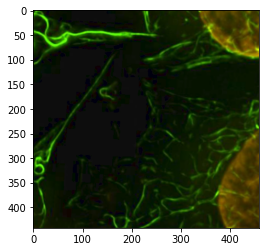

In [22]:
plt.imshow(resultado[7])